In [15]:
# TE plots

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from statannot import add_stat_annotation 
import seaborn as sns

In [ ]:
## 1. Fig 3h --- ---

In [3]:
original_seq_df = pd.read_csv('/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/bruno_et_al_2010_tx_loci.txt',sep='\t')
f_annotations = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/bruno_et_al_2010_tx_loci.annotation"
annotation = pd.read_csv(f_annotations,sep='\t')
df = pd.merge(original_seq_df, annotation,how='left',on=['gene','gene'])

### pure condition
dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
pure = pd.read_csv(dir+'homo_pure_allinfo_vivo.txt', sep='\t')
pure.columns 
pure=pure.dropna()
pure['weighted_corr'] = pd.to_numeric(pure['weighted_corr'], errors='coerce')
pure['replicate'] = pd.to_numeric(pure['replicate'], errors='coerce')
pure['window_start'] = pd.to_numeric(pure['window_start'], errors='coerce')
pure['window_end'] = pd.to_numeric(pure['window_end'], errors='coerce')
pure['window_start'] = pure['window_start'].astype(int)
pure['window_end'] = pure['window_end'].astype(int)
pure['win_length'] = pure['window_end'].astype(int) - pure['window_start'].astype(int)
pure['id'] = pure['gene'] + '_' + pure['window_start'].astype(str)  + '_' + pure['window_end'].astype(str)
pure = pure[(pure['replicate'] == 0) | (pure['replicate'] == 1) | (pure['replicate'] == 2)]
aver = pure.groupby(['condition', 'id', 'region'])['weighted_corr'].mean()
aver = aver.reset_index()
aver[['gene','window_start','window_end']] = aver['id'].str.split('_',2,expand = True)
pure=aver

combine = pd.merge(pure,df,how='left',on=['gene','gene']) 
dplot = combine.drop_duplicates()
dplot = dplot.dropna()
dplot = dplot.drop_duplicates()

dplot = dplot.sort_values(by='gene')
dplot['window_pos'] = (dplot['window_start'].astype(int)+dplot['window_end'].astype(int))/2
dplot = dplot[dplot['region'] == 'CDS'] 
print(dplot.shape)

### all the plots 
dplot1 = dplot
dplot1[['transcript','Gene name']] = dplot1['gene'].str.split('::',1,expand = True)
### TE
TE = pd.read_csv('/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/TE_all_paper_1.csv',sep=',')
TE.columns
TE = TE[['Gene name','S. cerevisiae ortholog', 'Gene Ribo 30C average TPM  ',
       'Gene Ribo 37C + serum  average TPM  ', 'Gene RNA 30C average TPM  ',
       'Gene RNA 37C + serum  average TPM ', '30TE', '37TE', '37/30 TE']]

### merge with TE
merge = pd.merge(dplot1,TE,how='left',left_on=['Gene name'], right_on=['Gene name'])

(1459, 15)


/tmp/ipykernel_15320/925124934.py:22: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  aver[['gene','window_start','window_end']] = aver['id'].str.split('_',2,expand = True)
/tmp/ipykernel_15320/925124934.py:37: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  dplot1[['transcript','Gene name']] = dplot1['gene'].str.split('::',1,expand = True)


/tmp/ipykernel_15320/3948701421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt['30TE'] = flt['30TE'].astype(float)
/tmp/ipykernel_15320/3948701421.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flt_top['quant'] = 'top1/3 TE in 30C'
/tmp/ipykernel_15320/3948701421.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

CDS    410
Name: region, dtype: int64
CDS    470
Name: region, dtype: int64
top1/3 TE in 30C v.s. bottom1/3 TE in 30C: Mann-Whitney-Wilcoxon test two-sided, P_val=9.515e-01 U_stat=2.094e+04
top1/3 TE in 37C v.s. bottom1/3 TE in 37C: Mann-Whitney-Wilcoxon test two-sided, P_val=8.516e-02 U_stat=3.015e+04


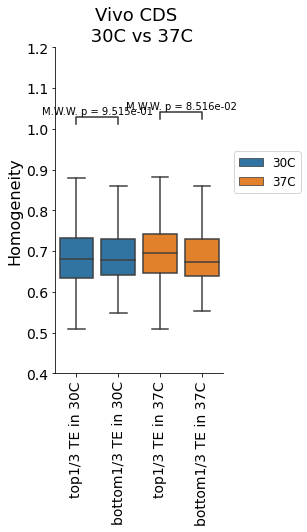

In [4]:
### 30C

flt = merge[merge['condition'] == '30C']
flt['30TE'] = flt['30TE'].astype(float)

flt = flt.sort_values(by=['30TE'])
diff_top = flt['30TE'].quantile(q=2/3)
diff_bottom = flt['30TE'].quantile(q=1/3)

flt_top = flt[flt['30TE'] >=diff_top]
flt_top['quant'] = 'top1/3 TE in 30C'
flt_bottom = flt[flt['30TE'] <=diff_bottom]
flt_bottom['quant'] = 'bottom1/3 TE in 30C'

flt_extre = pd.concat([flt_top,flt_bottom])
dplot_30C = flt_extre
print(flt_extre['region'].value_counts())


### 37C
flt = merge[merge['condition'] == '37C']
flt['37TE'] = flt['37TE'].astype(float)

flt = flt.sort_values(by=['37TE'])
diff_top = flt['37TE'].quantile(q=2/3)
diff_bottom = flt['37TE'].quantile(q=1/3)

flt_top = flt[flt['37TE'] >=diff_top]
flt_top['quant'] = 'top1/3 TE in 37C'
flt_bottom = flt[flt['37TE'] <=diff_bottom]
flt_bottom['quant'] = 'bottom1/3 TE in 37C'

flt_extre = pd.concat([flt_top,flt_bottom])
dplot_37C = flt_extre
print(flt_extre['region'].value_counts())

combine = pd.concat([dplot_30C,dplot_37C])
combine_flt = combine[combine['region'] =='CDS']

combine_flt.columns
dplot = combine_flt


plt.figure(figsize=(3,6))

ax = sns.boxplot(data=dplot, x='quant',y='weighted_corr', hue='condition', showfliers = False, dodge=False)  # order = order

plt.title('Vivo CDS \n 30C vs 37C',fontsize = 18)
plt.xlabel('',fontsize = 16) 
plt.ylabel('Homogeneity',fontsize = 16)
plt.xticks(fontsize = 14,rotation=90) 
plt.yticks(fontsize = 14) 
plt.ylim(0.4,1.2)
plt.legend(loc='best', bbox_to_anchor=(1.5, 0.7),prop={'size': 12})
ax.spines[['right', 'top']].set_visible(False) 

add_stat_annotation(ax, data = dplot, x = dplot['quant'], y = dplot['weighted_corr'], 
                    box_pairs = [("top1/3 TE in 30C", "bottom1/3 TE in 30C"), ("top1/3 TE in 37C", "bottom1/3 TE in 37C")
                                
                                 ],
                    
                    comparisons_correction = None,
                    test="Mann-Whitney", text_format='full', loc='inside', line_offset_to_box=0.1, verbose=3)  #line_offset_to_box=-0.001,

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
plt.savefig(dir_out+'Fig3h_TE_CDS_homo.pdf',bbox_inches='tight', dpi=300) 